In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import re
import nltk
import os
import prepare as p

from requests import get
from bs4 import BeautifulSoup

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('all_repos.csv')

In [3]:
df.iloc[686]

repo               mattwaite/NICAR19SportsDataViz
language                                      NaN
readme_contents                               NaN
Name: 686, dtype: object

In [4]:
df.isnull().sum()

repo                0
language           72
readme_contents     1
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df = df[df.readme_contents != 'failedreadme']

In [7]:
df.shape

(883, 3)

In [8]:
df.head()

,repo,language,readme_contents
0,ScottfreeLLC/AlphaPy,Python,AlphaPy\n=======\n\n|badge_pypi| |badge_downlo...
1,jalapic/engsoccerdata,R,"Latest GitHub version: 11/4/2022, v0.1.7\n\nN..."
2,bttmly/nba,JavaScript,# nba\n*Node.js client for nba.com API endpoin...
3,kyleskom/NBA-Machine-Learning-Sports-Betting,Python,# NBA Sports Betting Using Machine Learning 🏀\...
4,linouk23/NBA-Player-Movements,Python,# NBA Player Movements\n\nThis is a script for...


In [9]:
df.language.value_counts()

Python               232
JavaScript           141
Jupyter Notebook      86
R                     43
TypeScript            40
HTML                  40
Java                  39
PHP                   35
Ruby                  30
C#                    24
C++                   22
Dart                  22
Kotlin                20
CSS                   19
Vue                   10
Objective-C           10
Swift                 10
Go                     9
Rust                   6
XSLT                   4
TeX                    3
Shell                  3
Solidity               3
C                      3
Elixir                 3
CoffeeScript           2
MATLAB                 2
Visual Basic .NET      2
Svelte                 2
EJS                    2
Matlab                 2
Scala                  2
Haskell                1
Stata                  1
Visual Basic           1
Haxe                   1
Dockerfile             1
XML                    1
Max                    1
Batchfile              1


# Many of these are not commonly used and some are not actual program languages. I need to either remove or categorize some of these into 'other'

In [10]:
valid_languages = ["Python", 'HTML', "JavaScript", "R", "Java", "TypeScript", "PHP", "Ruby", "C#", "C++", "Dart", "Kotlin", "Objective-C", "Swift", "Go", "Rust", "C", "Elixir", "CoffeeScript", "MATLAB", "Visual Basic .NET", "Scala", "Haskell", "Stata", "Haxe", "Lua", "Perl", "Clojure"]

# Use the isin method to filter the DataFrame
df = df[df['language'].isin(valid_languages)]

df.head()


,repo,language,readme_contents
0,ScottfreeLLC/AlphaPy,Python,AlphaPy\n=======\n\n|badge_pypi| |badge_downlo...
1,jalapic/engsoccerdata,R,"Latest GitHub version: 11/4/2022, v0.1.7\n\nN..."
2,bttmly/nba,JavaScript,# nba\n*Node.js client for nba.com API endpoin...
3,kyleskom/NBA-Machine-Learning-Sports-Betting,Python,# NBA Sports Betting Using Machine Learning 🏀\...
4,linouk23/NBA-Player-Movements,Python,# NBA Player Movements\n\nThis is a script for...


In [11]:
df.language.value_counts()

Python               232
JavaScript           141
R                     43
TypeScript            40
HTML                  40
Java                  39
PHP                   35
Ruby                  30
C#                    24
Dart                  22
C++                   22
Kotlin                20
Swift                 10
Objective-C           10
Go                     9
Rust                   6
C                      3
Elixir                 3
Visual Basic .NET      2
MATLAB                 2
CoffeeScript           2
Scala                  2
Perl                   1
Lua                    1
Haskell                1
Haxe                   1
Stata                  1
Clojure                1
Name: language, dtype: int64

In [12]:
df.language.value_counts()[df.language.value_counts() < 46].sum()

370

In [13]:
# List of languages to rename to 'other'
languages_to_rename = ['HTML', 'R', 'Java', 'TypeScript', 'PHP', 'Ruby', 'C#', 'C++', 'Dart', 'Kotlin', 'Objective-C', 'Swift', 'Go', 'Rust', 'C', 'Elixir', 'Visual Basic .NET', 'MATLAB', 'CoffeeScript', 'Scala', 'Perl', 'Lua', 'Haskell', 'Haxe', 'Stata', 'Clojure']

# Replace the specified languages with 'other'
df['language'] = df['language'].replace(languages_to_rename, 'other')


In [14]:
df.language.value_counts()

other         370
Python        232
JavaScript    141
Name: language, dtype: int64

In [15]:
labels = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
other,370,0.497981
Python,232,0.312248
JavaScript,141,0.189771


In [16]:
df.shape

(743, 3)

# Clean

In [17]:
python_words = p.advanced_clean(' '.join(df[df.language == 'Python']['readme_contents']), l = True, extra_words = ['python', 'eww', 'sport']).split()
javascript_words = p.advanced_clean(' '.join(df[df.language == 'JavaScript']['readme_contents']), l = True).split()
other_words = p.advanced_clean(' '.join(df[df.language == 'other']['readme_contents']), l = True).split()
all_words = p.advanced_clean(' '.join(df.readme_contents), l = True).split()

Removed 40504 stopwords
---
Removed 22716 stopwords
---
Removed 41563 stopwords
---
Removed 104158 stopwords
---


In [18]:
python_freq = pd.Series(python_words).value_counts()
javascript_freq = pd.Series(javascript_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [19]:
python_freq

barry                                                         758
data                                                          643
file                                                          638
9                                                             465
team                                                          432
                                                             ... 
httpswwwespncomnflscoreboard_year2016seasontype2week8xhr1       1
httpswwwespncomnflscoreboard_year2016seasontype2week9xhr1       1
httpswwwespncomnflscoreboard_year2016seasontype2week10xhr1      1
httpswwwespncomnflscoreboard_year2016seasontype2week11xhr1      1
cvnlpendterm                                                    1
Length: 17271, dtype: int64

In [20]:
javascript_freq

9                                                                           806
team                                                                        336
data                                                                        309
get                                                                         280
game                                                                        279
                                                                           ... 
210                                                                           1
bio                                                                           1
accoladesawards                                                               1
demoassetsstaticthumbnail2020readmejpghttpwwwyoutubecomwatchviuo4ywiezak      1
printed                                                                       1
Length: 10913, dtype: int64

In [21]:
other_freq

data                                                         679
9                                                            629
1                                                            539
sport                                                        536
de                                                           531
                                                            ... 
1057                                                           1
eines                                                          1
projektes                                                      1
konnen                                                         1
httpuberjackcom201308clientidsinmultitenantrestfulapiuris      1
Length: 20596, dtype: int64

In [22]:
all_freq

9                                                    1900
data                                                 1631
team                                                 1294
sport                                                1274
file                                                 1259
                                                     ... 
operated                                                1
bsd3clausehttpsopensourceorglicensesbsd3clause          1
pluginhttpsgithubcomexavideoexacorecefplugin            1
gpl20httpswwwgnuorglicensesoldlicensesgpl20enhtml       1
cvnlpendterm                                            1
Length: 38972, dtype: int64

In [23]:
len(python_freq), len(javascript_freq), len(other_freq), len(all_freq)

(17271, 10913, 20596, 38972)

In [24]:
python_freq = python_freq[python_freq > 50]
javascript_freq = javascript_freq[javascript_freq > 50]
other_freq = other_freq[other_freq > 50]

len(python_freq), len(javascript_freq), len(other_freq)

(266, 136, 312)

In [25]:
list(nltk.bigrams(python_words))

[('alphapy', 'badge_pypi'),
 ('badge_pypi', 'badge_downloads'),
 ('badge_downloads', 'badge_docs'),
 ('badge_docs', 'badge_build'),
 ('badge_build', 'alphapy'),
 ('alphapy', 'machine'),
 ('machine', 'learning'),
 ('learning', 'framework'),
 ('framework', 'speculator'),
 ('speculator', 'data'),
 ('data', 'scientist'),
 ('scientist', 'written'),
 ('written', 'mainly'),
 ('mainly', 'scikitlearn'),
 ('scikitlearn', 'panda'),
 ('panda', 'library'),
 ('library', 'well'),
 ('well', 'many'),
 ('many', 'helpful'),
 ('helpful', 'package'),
 ('package', 'feature'),
 ('feature', 'engineering'),
 ('engineering', 'visualization'),
 ('visualization', 'thing'),
 ('thing', 'alphapy'),
 ('alphapy', 'run'),
 ('run', 'machine'),
 ('machine', 'learning'),
 ('learning', 'model'),
 ('model', 'using'),
 ('using', 'scikitlearn'),
 ('scikitlearn', 'kera'),
 ('kera', 'xgboost'),
 ('xgboost', 'lightgbm'),
 ('lightgbm', 'catboost'),
 ('catboost', 'generate'),
 ('generate', 'blended'),
 ('blended', 'stacked'),
 ('s

In [26]:
list(nltk.bigrams(javascript_words))

[('nba', 'nodejs'),
 ('nodejs', 'client'),
 ('client', 'nbacom'),
 ('nbacom', 'api'),
 ('api', 'endpoint'),
 ('endpoint', 'npm'),
 ('npm', 'install'),
 ('install', 'nba'),
 ('nba', 'note'),
 ('note', 'blacklisted'),
 ('blacklisted', 'ip'),
 ('ip', 'address'),
 ('address', 'appears'),
 ('appears', 'though'),
 ('though', 'nba'),
 ('nba', 'blacklisted'),
 ('blacklisted', 'certain'),
 ('certain', 'block'),
 ('block', 'ip'),
 ('ip', 'address'),
 ('address', 'specifically'),
 ('specifically', 'cloud'),
 ('cloud', 'hosting'),
 ('hosting', 'provider'),
 ('provider', 'including'),
 ('including', 'aws'),
 ('aws', 'may'),
 ('may', 'hit'),
 ('hit', 'situation'),
 ('situation', 'application'),
 ('application', 'using'),
 ('using', 'package'),
 ('package', 'work'),
 ('work', 'fine'),
 ('fine', 'local'),
 ('local', 'machine'),
 ('machine', 'doesnt'),
 ('doesnt', 'work'),
 ('work', 'deployed'),
 ('deployed', 'cloud'),
 ('cloud', 'server'),
 ('server', 'annoyingly'),
 ('annoyingly', 'request'),
 ('requ

In [27]:
list(nltk.bigrams(other_words))

[('latest', 'github'),
 ('github', 'version'),
 ('version', '142022'),
 ('142022', 'v017'),
 ('v017', 'nov'),
 ('nov', '2022'),
 ('2022', 'update'),
 ('update', 'european'),
 ('european', 'league'),
 ('league', 'datasets'),
 ('datasets',
  'englandscotlanditalygermanyfrancehollandspainbelgiumgreeceturkeyportugal'),
 ('englandscotlanditalygermanyfrancehollandspainbelgiumgreeceturkeyportugal',
  '_current_'),
 ('_current_', 'function'),
 ('function', 'date'),
 ('date', '2223'),
 ('2223', 'season'),
 ('season', 'ml'),
 ('ml', 'south'),
 ('south', 'africa'),
 ('africa', 'data'),
 ('data', 'still'),
 ('still', '2017'),
 ('2017', 'cup'),
 ('cup', 'data'),
 ('data', 'also'),
 ('also', 'available'),
 ('available', '2017'),
 ('2017', 'english'),
 ('english', 'nonleague'),
 ('nonleague', 'also'),
 ('also', 'updated'),
 ('updated', 'help'),
 ('help', 'curating'),
 ('curating', 'data'),
 ('data', 'appreciated'),
 ('appreciated', 'please'),
 ('please', 'get'),
 ('get', 'touch'),
 ('touch', 'engsocc

In [28]:
word_counts = (pd.concat([all_freq, other_freq, python_freq, javascript_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'python', 'javascript'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,other,python,javascript
0,420,244,154,0
00,29,0,0,0
000,1,0,0,0
0000,4,0,0,0
000000,34,0,0,0


In [29]:
word_counts.sort_values(by='python', ascending=False).head(10)

,all,other,python,javascript
barry,808,0,758,0
data,1631,679,643,309
file,1259,446,638,175
9,1900,629,465,806
team,1294,526,432,336
game,1080,378,423,279
1,1154,539,404,211
sport,1274,536,371,273
bee,512,0,367,145
install,784,268,366,150


In [30]:
pd.concat([word_counts[word_counts.python == 0].sort_values(by='javascript').tail(6),
           word_counts[word_counts.javascript == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.other == 0].sort_values(by='other').tail(6)])

,all,other,python,javascript
year,208,0,0,119
kind,173,0,0,126
group,192,0,0,130
const,200,0,0,165
npm,233,63,0,167
state,276,78,0,171
import,337,121,181,0
adam,193,0,183,0
tr,291,0,246,0
model,459,179,247,0


(-0.5, 399.5, 199.5, -0.5)

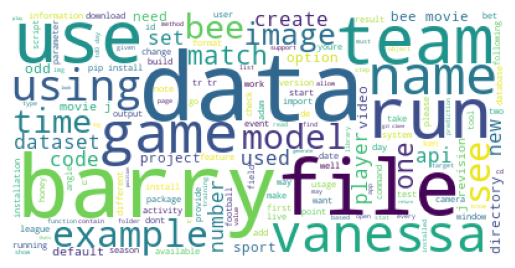

In [31]:
python_img = WordCloud(background_color='white').generate(' '.join (python_words))
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(python_img)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

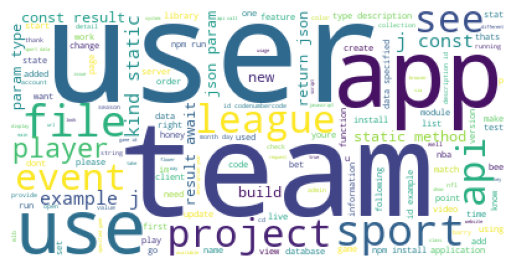

In [32]:
javascript_img = WordCloud(background_color='white').generate(' '.join (javascript_words))
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(javascript_img)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

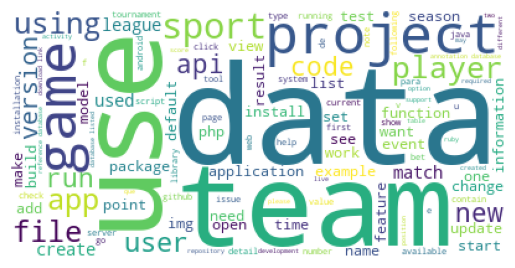

In [33]:
other_img = WordCloud(background_color='white').generate(' '.join (other_words))
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(other_img)
# axis aren't very useful for a word cloud
plt.axis('off')

Text(0.5, 1.0, 'Proportion of the 20 most common words')

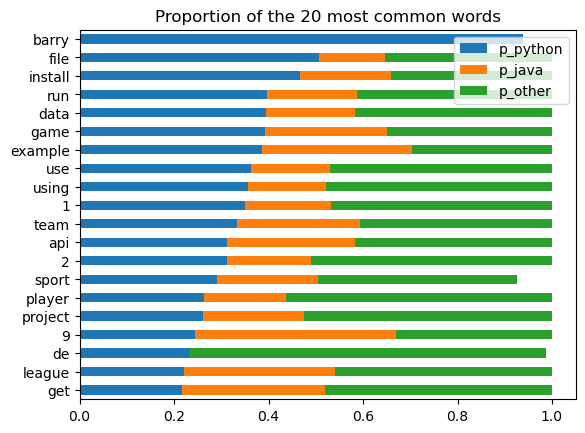

In [34]:

(word_counts
 .assign(p_python=word_counts.python / word_counts['all'],
         p_java=word_counts.javascript / word_counts['all'],
         p_other=word_counts.other / word_counts['all'])
 .sort_values(by='all')
 [['p_python', 'p_java', 'p_other']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common words')

In [35]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()

(bee, movie)         131
(revision, 81307)    131
(movie, j)           131
(j, revision)        131
(pip, install)       130
dtype: int64

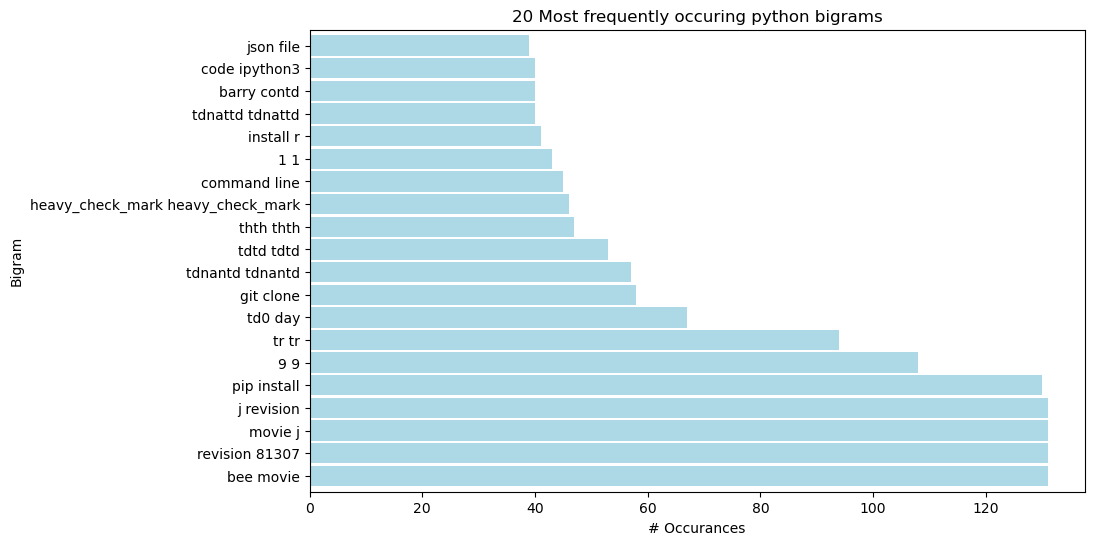

In [36]:
top_20_python_bigrams.sort_values(ascending=False).plot.barh(color='lightblue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
